## Importing Libaries

In [62]:
# Data manipulation and analysis
import pandas as pd               # For dataframes and data handling
import numpy as np                # For numerical operations and arrays

# Data visualization
import matplotlib.pyplot as plt   # For basic plotting
import seaborn as sns             # For advanced visualizations and styling

# Data preprocessing
from sklearn.preprocessing import StandardScaler  # For feature scaling/normalization

# Model validation and data splitting
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold  # For train/test split and cross-validation strategies

# Handling class imbalance
from imblearn.over_sampling import SMOTE          # For oversampling minority class using SMOTE

# Model evaluation metrics and plotting
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, roc_auc_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression                # Logistic Regression
from sklearn.svm import SVC                                        # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier                 # K-Nearest Neighbors
from sklearn.naive_bayes import GaussianNB                         # Naive Bayes
from sklearn.tree import DecisionTreeClassifier                    # Decision Tree
from sklearn.ensemble import (
    RandomForestClassifier,                                        # Random Forest
    AdaBoostClassifier,                                            # AdaBoost
    GradientBoostingClassifier                                     # Gradient Boosting
)
from xgboost import XGBClassifier                                  # XGBoost (Extreme Gradient Boosting)

In [63]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## DATA CLEANING

In [66]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce').astype(float)

In [67]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [68]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## DATA PREPARATION

In [8]:
data = df.copy()

In [9]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
label_encoding_columns = ['Partner', 'Dependents', 'PhoneService',
                          'PaperlessBilling', 'Churn']

In [12]:
for col in label_encoding_columns:
    print(col)
    print(data[col].unique()[:2])

Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
PaperlessBilling
['Yes' 'No']
Churn
['No' 'Yes']


In [13]:
for col in label_encoding_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [15]:
data = data.drop('customerID', axis = 1)

In [16]:
categorical = data.select_dtypes(include = ['object'])

In [17]:
categorical_columns = categorical.columns.to_list()
categorical_columns

['gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [18]:
for col in categorical_columns:
    print(col)
    print(data[col].unique()[:5])

gender
['Female' 'Male']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [19]:
new_data = pd.get_dummies(data, dtype = int)

In [20]:
new_data.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0


In [21]:
new_data.isnull().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBack

## DATA VISUALIZATION

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


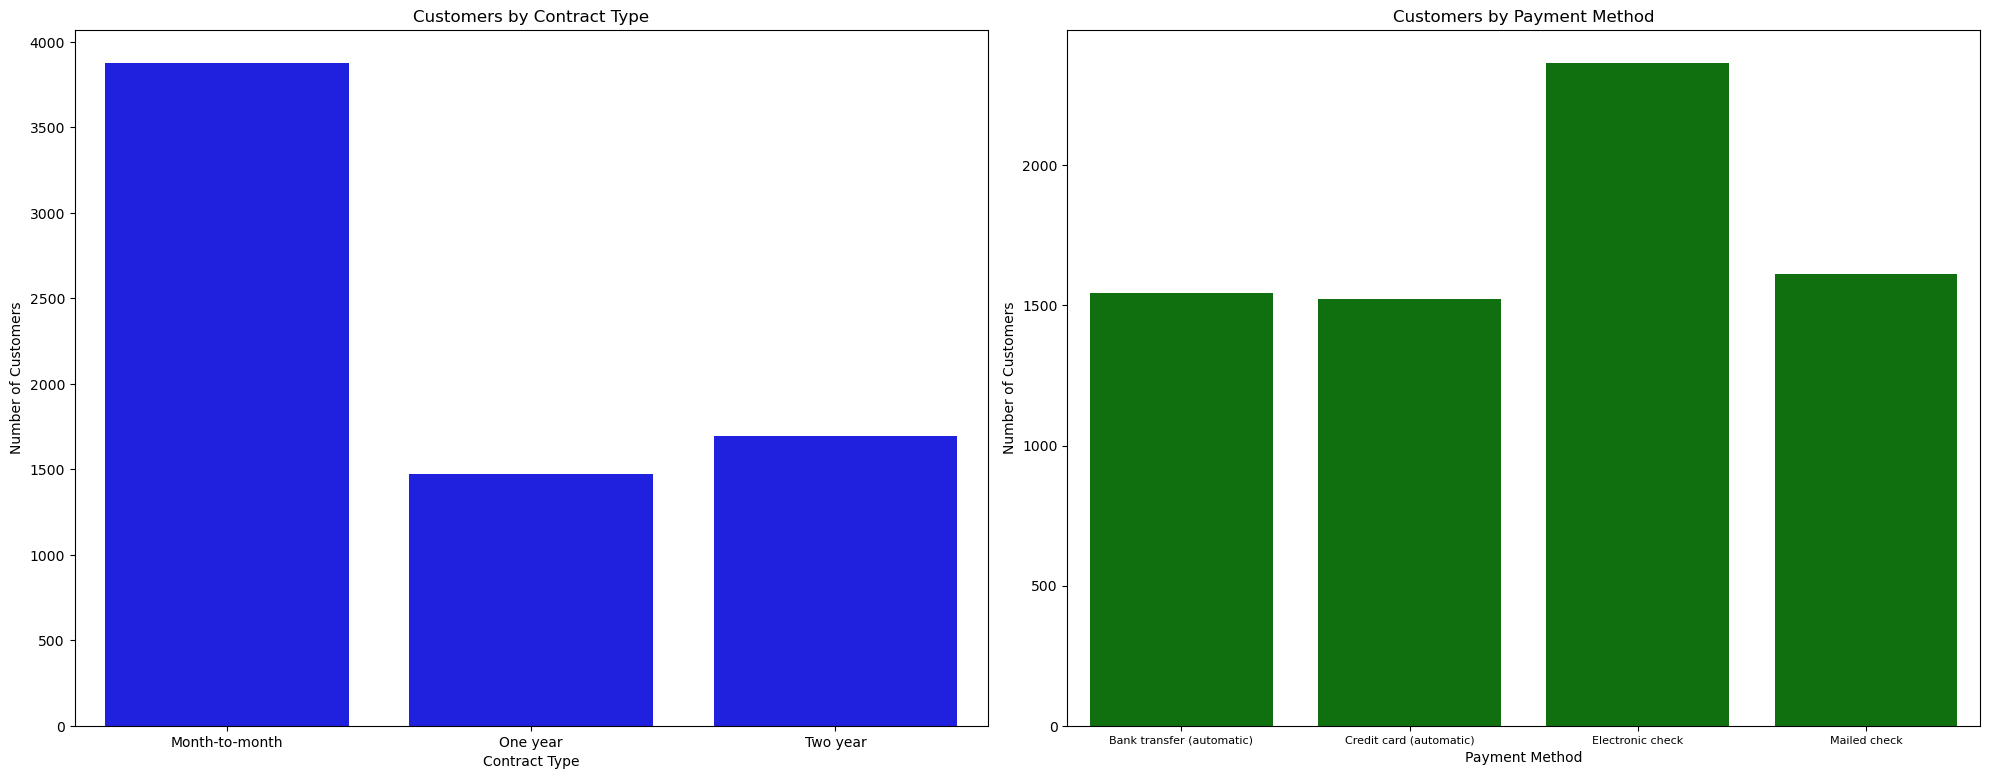

In [23]:
# Plot setup
plt.figure(figsize=(20, 15))

# Plot 1: Distribution of customers by contract type
plt.subplot(2, 2, 1)
contract_plot = df.groupby('Contract')['customerID'].count().reset_index()
contract_plot.columns = ['Contract Type', 'No_of_Customers']
sns.barplot(data=contract_plot, x='Contract Type', y='No_of_Customers', color='blue')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.title('Customers by Contract Type')

# Plot 2: Distribution of customers by payment method
plt.subplot(2, 2, 2)
payment_plot = df.groupby('PaymentMethod')['customerID'].count().reset_index()
payment_plot.columns = ['Payment Method', 'No_of_Customers']
sns.barplot(data=payment_plot, x='Payment Method', y='No_of_Customers', color='green')
plt.xticks(fontsize=8)
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.title('Customers by Payment Method')

# Show the plots
plt.tight_layout()
plt.show()

In [24]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [25]:
df.groupby('PhoneService')['customerID'].count()

PhoneService
No      682
Yes    6361
Name: customerID, dtype: int64

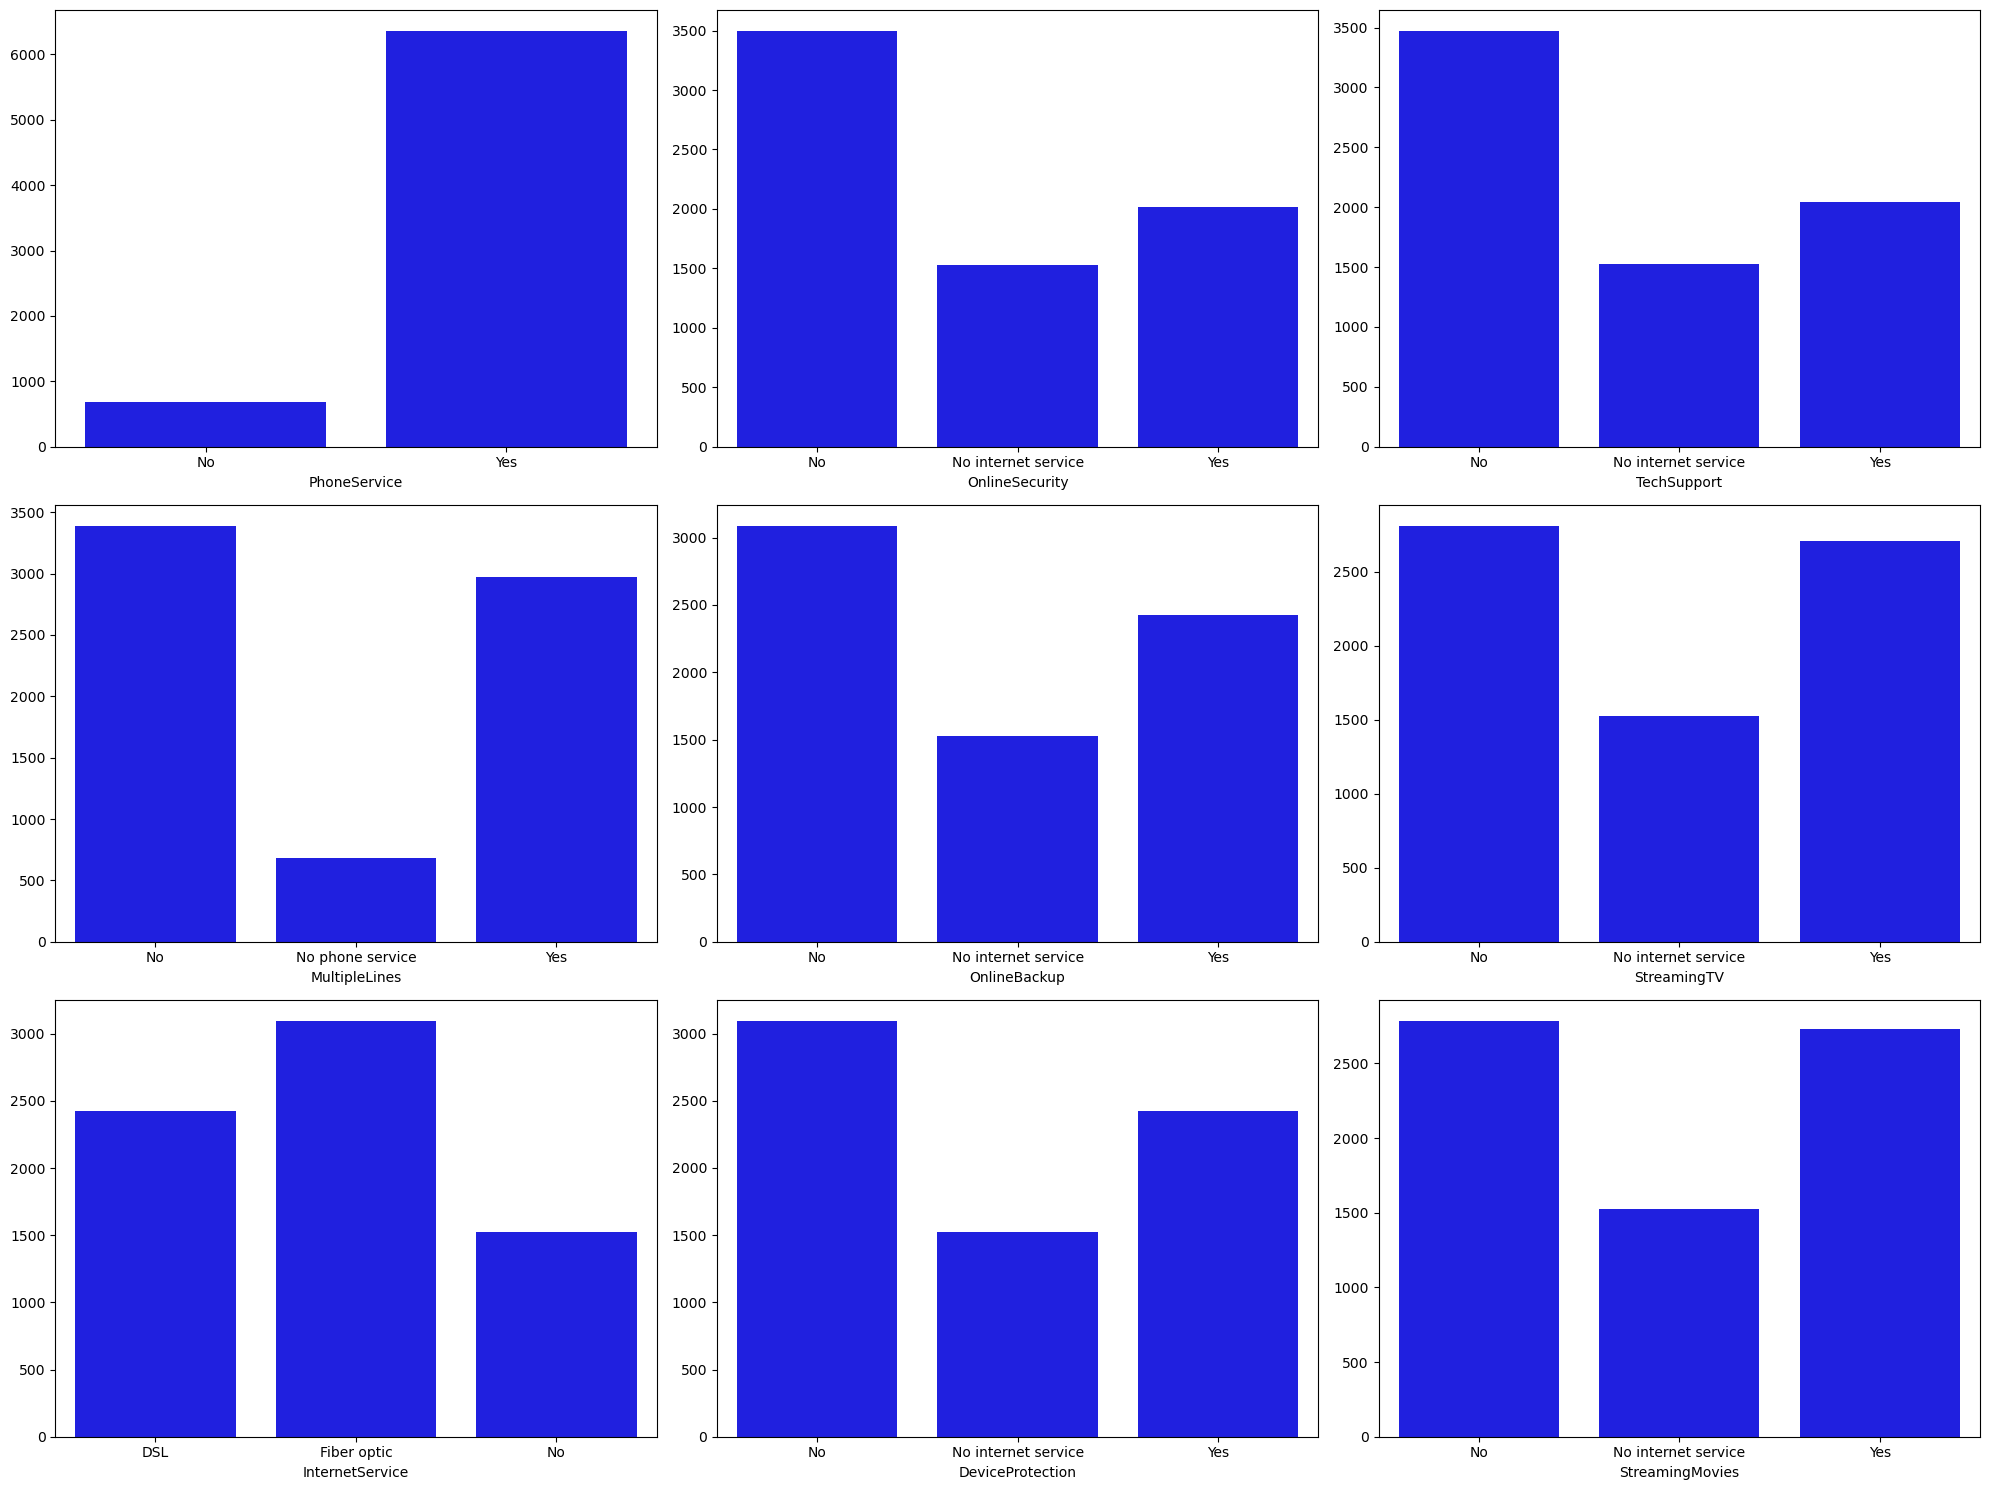

In [26]:
plt.figure(figsize=(20, 15))

# Define the number of rows and columns
rows, cols = 3, 3

# Plot 1: Distribution of customers by PhoneService
plt.subplot(rows, cols, 1)
contract_plot = df.groupby('PhoneService')['customerID'].count().reset_index()
contract_plot.columns = ['PhoneService', 'No_of_Customers']
sns.barplot(data=contract_plot, x='PhoneService', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Plot 2: Distribution of customers by OnlineSecurity
plt.subplot(rows, cols, 2)
payment_plot = df.groupby('OnlineSecurity')['customerID'].count().reset_index()
payment_plot.columns = ['OnlineSecurity', 'No_of_Customers']
sns.barplot(data=payment_plot, x='OnlineSecurity', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Plot 3: Distribution of customers by TechSupport
plt.subplot(rows, cols, 3)
payment_plot = df.groupby('TechSupport')['customerID'].count().reset_index()
payment_plot.columns = ['TechSupport', 'No_of_Customers']
sns.barplot(data=payment_plot, x='TechSupport', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Plot 4: Distribution of customers by MultipleLines
plt.subplot(rows, cols, 4)
payment_plot = df.groupby('MultipleLines')['customerID'].count().reset_index()
payment_plot.columns = ['MultipleLines', 'No_of_Customers']
sns.barplot(data=payment_plot, x='MultipleLines', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Plot 5: Distribution of customers by OnlineBackup
plt.subplot(rows, cols, 5)
payment_plot = df.groupby('OnlineBackup')['customerID'].count().reset_index()
payment_plot.columns = ['OnlineBackup', 'No_of_Customers']
sns.barplot(data=payment_plot, x='OnlineBackup', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Plot 6: Distribution of customers by StreamingTV
plt.subplot(rows, cols, 6)
payment_plot = df.groupby('StreamingTV')['customerID'].count().reset_index()
payment_plot.columns = ['StreamingTV', 'No_of_Customers']
sns.barplot(data=payment_plot, x='StreamingTV', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Plot 7: Distribution of customers by InternetService
plt.subplot(rows, cols, 7)
payment_plot = df.groupby('InternetService')['customerID'].count().reset_index()
payment_plot.columns = ['InternetService', 'No_of_Customers']
sns.barplot(data=payment_plot, x='InternetService', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Plot 8: Distribution of customers by DeviceProtection
plt.subplot(rows, cols, 8)
payment_plot = df.groupby('DeviceProtection')['customerID'].count().reset_index()
payment_plot.columns = ['DeviceProtection', 'No_of_Customers']
sns.barplot(data=payment_plot, x='DeviceProtection', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Plot 9: Distribution of customers by StreamingMovies
plt.subplot(rows, cols, 9)
payment_plot = df.groupby('StreamingMovies')['customerID'].count().reset_index()
payment_plot.columns = ['StreamingMovies', 'No_of_Customers']
sns.barplot(data=payment_plot, x='StreamingMovies', y='No_of_Customers', color='blue')
plt.ylabel(None)  # Remove y-axis label

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [27]:
churn_data = df[df['Churn'] == 'Yes']

In [28]:
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


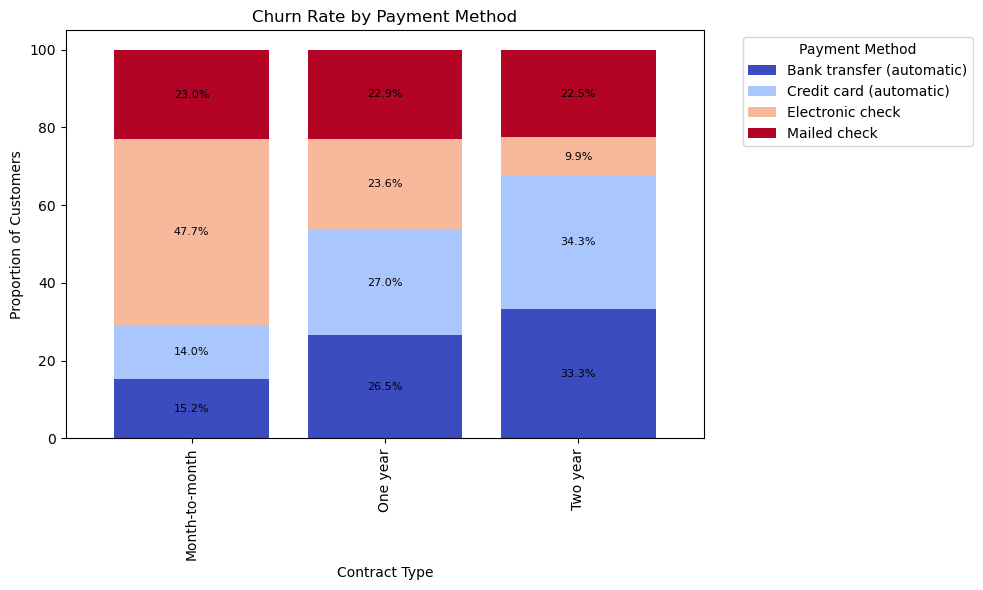

In [29]:
# Group by Contract and PaymentMethod to count customers
contract_payment = df.groupby(['Contract', 'PaymentMethod']).size().unstack(fill_value=0)

# Convert counts to percentages
contract_payment_percentage = contract_payment.div(contract_payment.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = contract_payment_percentage.plot(
    kind='bar', stacked=True, ax=ax, colormap='coolwarm', width=0.8
)

# Add labels and title
plt.xlabel('Contract Type')
plt.ylabel('Proportion of Customers')
plt.title('Churn Rate by Payment Method')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add data labels
for container in bars.containers:
    for bar in container:
        if bar.get_height() > 0:  # Add label only if height > 0
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + bar.get_height() / 2
            percentage = f"{bar.get_height():.1f}%"  # Format percentage
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()


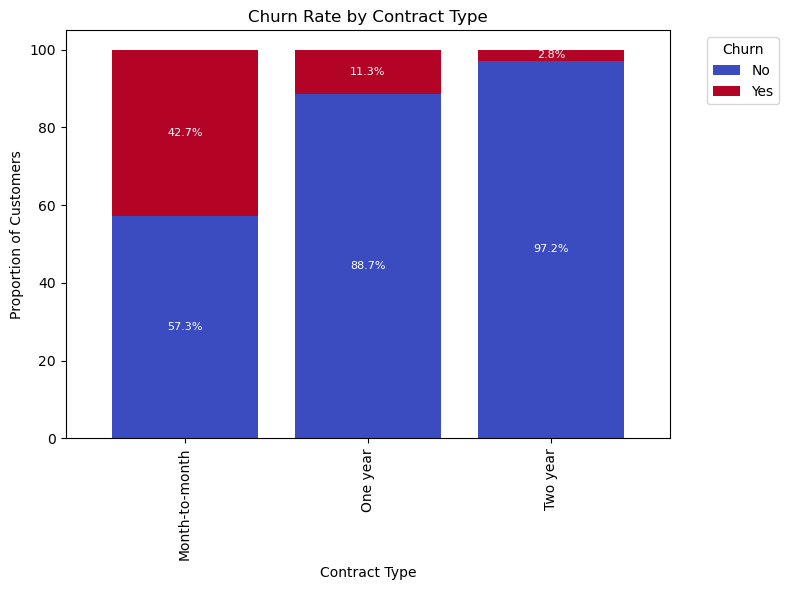

In [30]:
# Group by Contract and PaymentMethod to count customers
contract_payment = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Convert counts to percentages
contract_payment_percentage = contract_payment.div(contract_payment.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars = contract_payment_percentage.plot(
    kind='bar', stacked=True, ax=ax, colormap='coolwarm', width=0.8
)

# Add labels and title
plt.xlabel('Contract Type')
plt.ylabel('Proportion of Customers')
plt.title('Churn Rate by Contract Type')
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add data labels
for container in bars.containers:
    for bar in container:
        if bar.get_height() > 0:  # Add label only if height > 0
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + bar.get_height() / 2
            percentage = f"{bar.get_height():.1f}%"  # Format percentage
            ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=8, color='white')

plt.tight_layout()
plt.show()


## Feature elimination

In [31]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [32]:
numeric_data = data.select_dtypes(include = ['number'])

In [33]:
numeric_data.drop('Churn', axis = 1, inplace = True)

In [34]:
numeric_data.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102395
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.318812
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064535
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.824757
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.112851
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157676
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.650468
TotalCharges,0.102395,0.318812,0.064535,0.824757,0.112851,0.157676,0.650468,1.000000


In [35]:
numeric_data.corr()['TotalCharges'].sort_values()

Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
Partner             0.318812
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<Axes: >

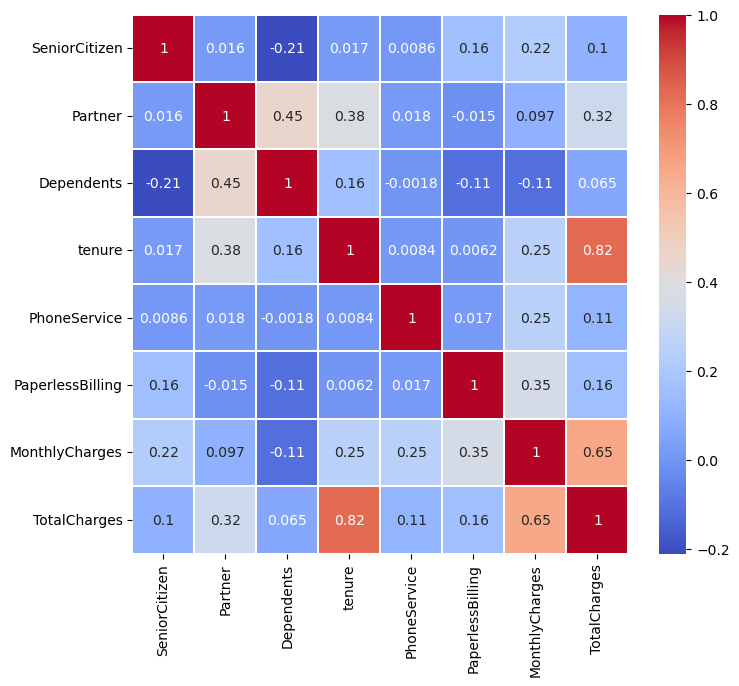

In [36]:
plt.figure(figsize = (8, 7))
sns.heatmap(numeric_data.corr(), annot = True, cmap = 'coolwarm', linewidths=0.3)

In [37]:
scaler = StandardScaler()

In [38]:
scaled_data = scaler.fit_transform(numeric_data)

In [39]:
scaled_data

array([[-0.43991649,  1.03453023, -0.65401193, ...,  0.8297975 ,
        -1.16032292, -0.99497138],
       [-0.43991649, -0.96662231, -0.65401193, ..., -1.20511329,
        -0.25962894, -0.17387565],
       [-0.43991649, -0.96662231, -0.65401193, ...,  0.8297975 ,
        -0.36266036, -0.96039939],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  0.8297975 ,
        -1.1686319 , -0.85518222],
       [ 2.27315869,  1.03453023, -0.65401193, ...,  0.8297975 ,
         0.32033821, -0.87277729],
       [-0.43991649, -0.96662231, -0.65401193, ...,  0.8297975 ,
         1.35896134,  2.01391739]])

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]
vif['features'] = numeric_data.columns

In [42]:
vif.round(2)

,vif,features
0,1.11,SeniorCitizen
1,1.46,Partner
2,1.36,Dependents
3,5.85,tenure
4,1.08,PhoneService
5,1.17,PaperlessBilling
6,3.61,MonthlyCharges
7,9.33,TotalCharges


### Remove TotalCharges
### Reason: TotalCharges is often a derived feature (tenure * MonthlyCharges) or strongly dependent on them, making it redundant in the model.

In [43]:
X = numeric_data.drop('TotalCharges', axis = 1)

In [44]:
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges
0,0,1,0,1,0,1,29.85
1,0,0,0,34,1,0,56.95
2,0,0,0,2,1,1,53.85
3,0,0,0,45,0,0,42.30
4,0,0,0,2,1,1,70.70


In [45]:
X_scaled = scaler.fit_transform(X)

In [46]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

In [47]:
vif.round(2)

,vif,features
0,1.11,SeniorCitizen
1,1.46,Partner
2,1.36,Dependents
3,1.25,tenure
4,1.08,PhoneService
5,1.17,PaperlessBilling
6,1.38,MonthlyCharges


In [48]:
new_data = new_data.drop('TotalCharges', axis = 1)

In [49]:
X = new_data.drop('Churn', axis = 1)
y = new_data['Churn']

In [50]:
X.shape, y.shape

((7043, 40), (7043,))

In [51]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

## Data Processing

In [52]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", pd.Series(y_smote).value_counts())

Before SMOTE: Churn
0    5174
1    1869
Name: count, dtype: int64
After SMOTE: Churn
0    5174
1    5174
Name: count, dtype: int64


In [53]:
X_smote.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Female,gender_Male,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,1,0,1,...,1,0,0,1,0,0,0,0,1,0


In [54]:
X_scaled = scaler.fit_transform(X_smote)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_smote.columns)

In [55]:
X_scaled_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,gender_Female,gender_Male,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.407719,1.267238,-0.528309,-1.114483,-3.045664,0.805005,-1.328468,1.105239,-0.913292,-0.883780,...,1.201916,-0.443838,-0.783646,0.739919,-0.422120,-0.44602,-0.440089,-0.428931,1.290861,-0.470875
1,-0.407719,-0.789118,-0.528309,0.260975,0.328336,-1.242228,-0.386393,-0.904781,1.094941,1.131503,...,1.201916,-0.443838,-0.783646,-1.351499,2.368996,-0.44602,-0.440089,-0.428931,-0.774677,2.123704
2,-0.407719,-0.789118,-0.528309,-1.072803,0.328336,0.805005,-0.494158,-0.904781,1.094941,1.131503,...,1.201916,-0.443838,-0.783646,0.739919,-0.422120,-0.44602,-0.440089,-0.428931,-0.774677,2.123704
3,-0.407719,-0.789118,-0.528309,0.719461,-3.045664,-1.242228,-0.895669,-0.904781,1.094941,-0.883780,...,1.201916,-0.443838,-0.783646,-1.351499,2.368996,-0.44602,2.272266,-0.428931,-0.774677,-0.470875
4,-0.407719,-0.789118,-0.528309,-1.072803,0.328336,0.805005,0.091598,1.105239,-0.913292,1.131503,...,1.201916,-0.443838,-0.783646,0.739919,-0.422120,-0.44602,-0.440089,-0.428931,1.290861,-0.470875


In [56]:
y = y_smote

## Model Training

In [57]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(kernel='linear', C=1.0, gamma='scale', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators = 1000),
    'ADA Boost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'KernelSVM' : SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
}

# Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store results
results = []

# Loop through each model
for model_name, model in models.items():
    metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': [],
        'F2': []
    }
    
    # Cross-validation loop
    for train_index, test_index in skf.split(X_scaled_df, y):
        X_train, X_test = X_scaled_df.iloc[train_index], X_scaled_df.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Append metrics
        metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['Precision'].append(precision_score(y_test, y_pred, zero_division=0))
        metrics['Recall'].append(recall_score(y_test, y_pred))
        metrics['F1'].append(f1_score(y_test, y_pred))
        metrics['F2'].append(fbeta_score(y_test, y_pred, beta=2))

    # Store average results
    results.append({
        'Model': model_name,
        'Accuracy': np.mean(metrics['Accuracy']),
        'Precision': np.mean(metrics['Precision']),
        'Recall': np.mean(metrics['Recall']),
        'F1 Score': np.mean(metrics['F1']),
        'F2 Score': np.mean(metrics['F2']),
    })

# Display results in a sorted DataFrame
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)

C:\Users\mcand\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mcand\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mcand\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mcand\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\mca

In [58]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,F2 Score
5,Random Forest,0.856010,0.858770,0.852721,0.855530,0.853795
8,Gradient Boost,0.850210,0.838552,0.867996,0.852803,0.861801
7,XGBoost,0.852241,0.854125,0.850024,0.851896,0.850731
0,Logistic Regression,0.845572,0.855081,0.832627,0.843524,0.836910
9,KernelSVM,0.844413,0.857497,0.826637,0.841627,0.832533
6,ADA Boost,0.835618,0.814073,0.870316,0.841110,0.858356
1,Support Vector Classifier,0.842577,0.857345,0.822382,0.839340,0.829047
2,KNN,0.822475,0.805899,0.850217,0.827261,0.840831
4,Decision Tree,0.811172,0.806427,0.819483,0.812739,0.816732
3,Naive Bayes,0.776476,0.733096,0.870312,0.795711,0.838817


In [59]:
results_df = results_df.set_index('Model')
results_df.sort_values(by = 'F2 Score', ascending = False)

,Accuracy,Precision,Recall,F1 Score,F2 Score
Model,,,,,
Gradient Boost,0.850210,0.838552,0.867996,0.852803,0.861801
ADA Boost,0.835618,0.814073,0.870316,0.841110,0.858356
Random Forest,0.856010,0.858770,0.852721,0.855530,0.853795
XGBoost,0.852241,0.854125,0.850024,0.851896,0.850731
KNN,0.822475,0.805899,0.850217,0.827261,0.840831
Naive Bayes,0.776476,0.733096,0.870312,0.795711,0.838817
Logistic Regression,0.845572,0.855081,0.832627,0.843524,0.836910
KernelSVM,0.844413,0.857497,0.826637,0.841627,0.832533
Support Vector Classifier,0.842577,0.857345,0.822382,0.839340,0.829047


## Best Model

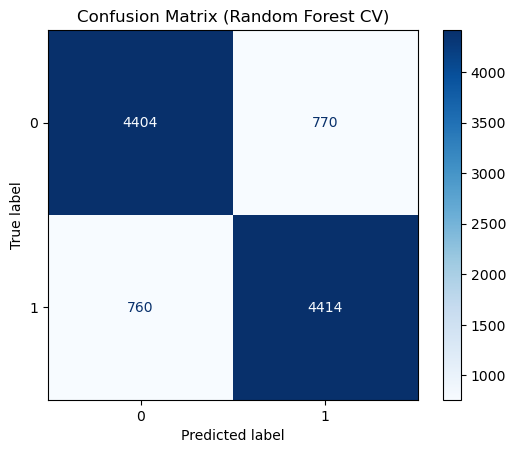

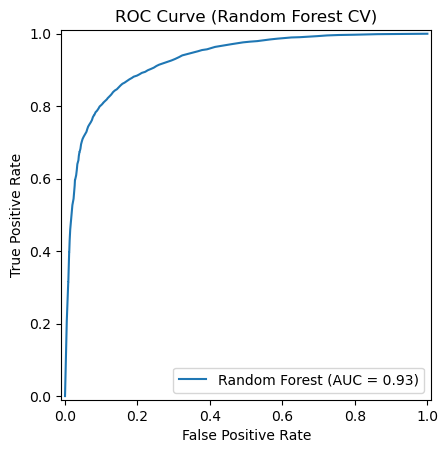

In [60]:
# Initialize model and StratifiedKFold
model = RandomForestClassifier(random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store predictions and true labels across folds
y_true_all = []
y_pred_all = []
y_proba_all = []

# Cross-validation loop
for train_idx, test_idx in skf.split(X_scaled_df, y):
    X_train, X_test = X_scaled_df.iloc[train_idx], X_scaled_df.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Prob for class 1 (Churn)

    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)
    y_proba_all.extend(y_proba)

# Convert lists to arrays
y_true_all = np.array(y_true_all)
y_pred_all = np.array(y_pred_all)
y_proba_all = np.array(y_proba_all)

# Confusion Matrix
cm = confusion_matrix(y_true_all, y_pred_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Random Forest CV)")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)
roc_auc = roc_auc_score(y_true_all, y_proba_all)

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Random Forest").plot()
plt.title("ROC Curve (Random Forest CV)")
plt.show()